<a href="https://colab.research.google.com/github/minurawijesinghe/crime_prediction_ML/blob/main/Crime_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [ ]:
#df = pd.concat([pd.read_csv('../input/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False), pd.read_csv('../input/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)], ignore_index=True)
#df = pd.concat([df, pd.read_csv('../input/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)], ignore_index=True)
#df = pd.concat([df, pd.read_csv('../input/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)], ignore_index=True)
df = pd.read_csv('Crimes_-_One_year_prior_to_present.csv', error_bad_lines=False)
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JE163990,11/23/2020 03:05:00 PM,073XX S SOUTH SHORE DR,0820,THEFT,$500 AND UNDER,APARTMENT,N,N,334,7.0,06,NaN,NaN,NaN,NaN,NaN
1,JE143283,02/16/2021 05:35:00 PM,017XX W 119TH ST,0460,BATTERY,SIMPLE,RESTAURANT,N,N,2234,34.0,08B,1166691.0,1825767.0,41.677464,-87.665496,"(41.677464116, -87.665495904)"
2,JD390623,09/30/2020 12:00:00 PM,018XX N Sedgwick St,0810,THEFT,OVER $500,RESIDENCE,N,N,1814,43.0,06,1173303.0,1912547.0,41.915454,-87.638727,"(41.915454333, -87.638727274)"
3,JD381795,09/13/2020 12:00:00 PM,015XX N KINGSBURY ST,0810,THEFT,OVER $500,GROCERY FOOD STORE,Y,N,1822,27.0,06,1169505.0,1910252.0,41.909240,-87.652748,"(41.909240284, -87.65274758)"
4,JE148785,12/04/2020 11:50:00 AM,020XX N BURLING ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,N,N,1812,43.0,11,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_values = list(df.isna().sum()) 
cols = list(df.columns) 
print(cols) 
for i in range(len(cols)):
  if (missing_values[i] == 0):
    cols[i]="Others"
    df = df.dropna() 
    
df.info()
df=df.drop_duplicates()
crimes = df


['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR', ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION', ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200333 entries, 1 to 203474
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   200333 non-null  object 
 1   DATE  OF OCCURRENCE     200333 non-null  object 
 2   BLOCK                   200333 non-null  object 
 3    IUCR                   200333 non-null  object 
 4    PRIMARY DESCRIPTION    200333 non-null  object 
 5    SECONDARY DESCRIPTION  200333 non-null  object 
 6    LOCATION DESCRIPTION   200333 non-null  object 
 7   ARREST                  200333 non-null  object 
 8   DOMESTIC                200333 non-null  object 
 9   BEAT                    200333 non-null  int64 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200325 entries, 1 to 203474
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   200325 non-null  object 
 1   DATE  OF OCCURRENCE     200325 non-null  object 
 2   BLOCK                   200325 non-null  object 
 3    IUCR                   200325 non-null  object 
 4    PRIMARY DESCRIPTION    200325 non-null  object 
 5    SECONDARY DESCRIPTION  200325 non-null  object 
 6    LOCATION DESCRIPTION   200325 non-null  object 
 7   ARREST                  200325 non-null  object 
 8   DOMESTIC                200325 non-null  object 
 9   BEAT                    200325 non-null  int64  
 10  WARD                    200325 non-null  float64
 11  FBI CD                  200325 non-null  object 
 12  X COORDINATE            200325 non-null  float64
 13  Y COORDINATE            200325 non-null  float64
 14  LATITUDE            

In [ ]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna()

In [ ]:
#df = df.drop([''], axis=1)
#df = df.drop(['ID'], axis=1)
df = df.drop(['CASE#'], axis=1) 
df = df.drop(['LOCATION'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200325 entries, 1 to 203474
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DATE  OF OCCURRENCE     200325 non-null  object 
 1   BLOCK                   200325 non-null  object 
 2    IUCR                   200325 non-null  object 
 3    PRIMARY DESCRIPTION    200325 non-null  object 
 4    SECONDARY DESCRIPTION  200325 non-null  object 
 5    LOCATION DESCRIPTION   200325 non-null  object 
 6   ARREST                  200325 non-null  object 
 7   DOMESTIC                200325 non-null  object 
 8   BEAT                    200325 non-null  int64  
 9   WARD                    200325 non-null  float64
 10  FBI CD                  200325 non-null  object 
 11  X COORDINATE            200325 non-null  float64
 12  Y COORDINATE            200325 non-null  float64
 13  LATITUDE                200325 non-null  float64
 14  LONGITUDE           

In [ ]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['Date'] = pd.to_datetime(df['DATE  OF OCCURRENCE'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['DATE  OF OCCURRENCE'], axis=1)
df.head()
data = df
#df = df.drop([''], axis=1) 
#df = df.drop(['Updated On'], axis=1)


In [ ]:
# Convert Categorical Attributes to Numerical
df['BLOCK'],block_labels = pd.factorize(df["BLOCK"])
df[' IUCR'],iucr_labels = pd.factorize(df[" IUCR"])
df[' SECONDARY DESCRIPTION'],sec_labels = pd.factorize(df[" SECONDARY DESCRIPTION"])
df[' LOCATION DESCRIPTION'],loc_labels = pd.factorize(df[" LOCATION DESCRIPTION"])
df['FBI CD'],fbicd_labels = pd.factorize(df["FBI CD"])
#df['LOCATION'],loc_labels = pd.factorize(df["LOCATION"])
#y, label = pd.factorize(train["ALLOW/BLOCK"])
df.head()

,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,Year,Month,Day,Hour,Minute,Second
1,0,0,BATTERY,0,0,N,N,2234,34.0,0,1166691.0,1825767.0,41.677464,-87.665496,2021,2,16,17,35,0
2,1,1,THEFT,1,1,N,N,1814,43.0,1,1173303.0,1912547.0,41.915454,-87.638727,2020,9,30,12,0,0
3,2,1,THEFT,1,2,Y,N,1822,27.0,1,1169505.0,1910252.0,41.909240,-87.652748,2020,9,13,12,0,0
5,3,2,THEFT,2,3,N,N,1712,40.0,1,1154065.0,1935878.0,41.979882,-87.708781,2020,10,8,7,30,0
6,4,3,BATTERY,3,3,N,Y,2532,37.0,0,1139392.0,1909706.0,41.908344,-87.763384,2020,10,8,17,10,0


In [ ]:
print(loc_labels)

Index(['RESTAURANT', 'RESIDENCE', 'GROCERY FOOD STORE', 'STREET',
       'SMALL RETAIL STORE', 'GAS STATION', 'ALLEY', 'APARTMENT', 'SIDEWALK',
       'CONVENIENCE STORE',
       ...
       'STAIRWELL', 'SCHOOL YARD', 'LIQUOR STORE', 'CHA HALLWAY',
       'CTA "L" PLATFORM', 'MOTEL',
       'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA', 'CHA GROUNDS', 'OFFICE',
       'LAKE'],
      dtype='object', length=132)


In [ ]:
Target = ' PRIMARY DESCRIPTION'
print('Target: ', Target)

Target:   PRIMARY DESCRIPTION


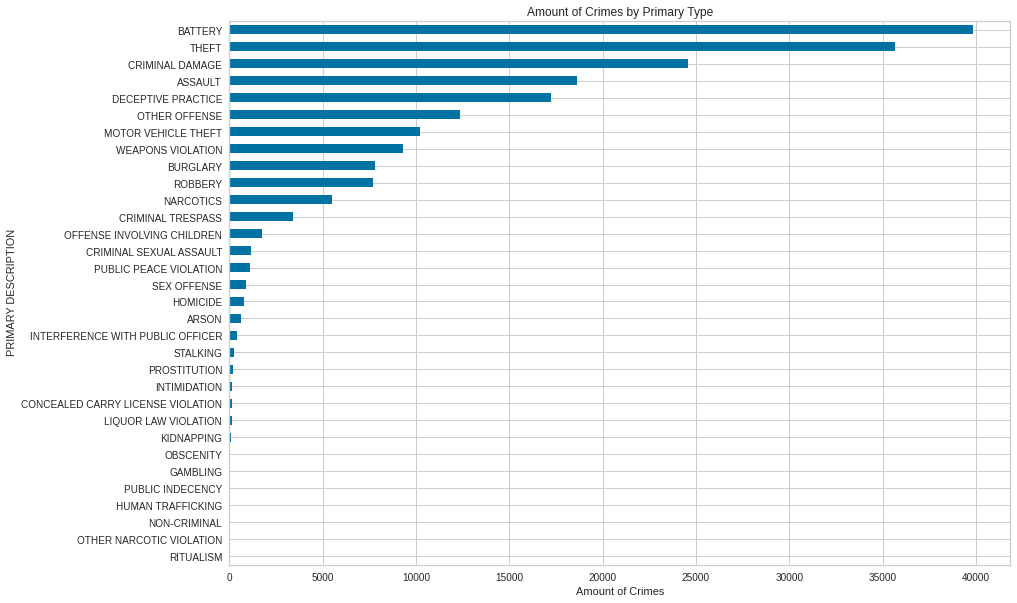

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df[' PRIMARY DESCRIPTION']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby([' PRIMARY DESCRIPTION'])['BLOCK'].size().reset_index()
all_classes['Amt'] = all_classes['BLOCK']
all_classes = all_classes.drop(['BLOCK'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,PRIMARY DESCRIPTION,Amt
29,STALKING,247
23,PROSTITUTION,212
13,INTIMIDATION,165
4,CONCEALED CARRY LICENSE VIOLATION,158
15,LIQUOR LAW VIOLATION,140
14,KIDNAPPING,116
19,OBSCENITY,53
9,GAMBLING,22
24,PUBLIC INDECENCY,8
11,HUMAN TRAFFICKING,5


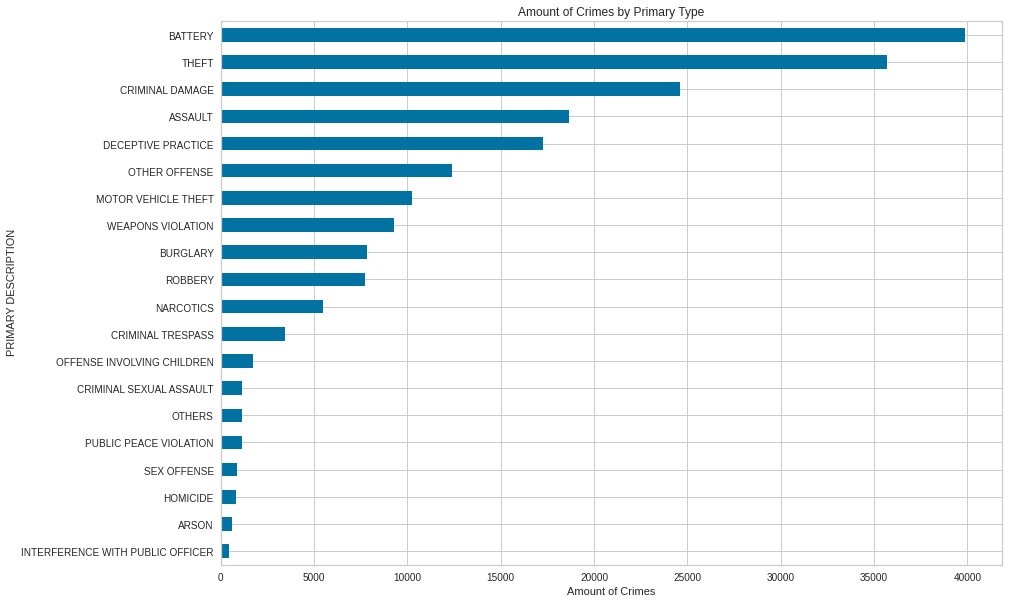

In [ ]:
# After that, we replaced it with label 'OTHERS'
df.loc[df[' PRIMARY DESCRIPTION'].isin(unwanted_classes[' PRIMARY DESCRIPTION']), ' PRIMARY DESCRIPTION'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df[' PRIMARY DESCRIPTION']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# Now we are left with 14 Class as our predictive class
Classes = df[' PRIMARY DESCRIPTION'].unique()
Classes

array(['BATTERY', 'THEFT', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'CRIMINAL DAMAGE', 'BURGLARY', 'ROBBERY', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'ASSAULT', 'HOMICIDE',
       'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'NARCOTICS',
       'PUBLIC PEACE VIOLATION', 'OTHERS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL SEXUAL ASSAULT',
       'ARSON'], dtype=object)

In [ ]:
df[' PRIMARY DESCRIPTION'],primary_labels = pd.factorize(df[" PRIMARY DESCRIPTION"]) 
df[' PRIMARY DESCRIPTION'].unique()
#print(primary_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

**CRIME TYPE CLASSIFICATION**

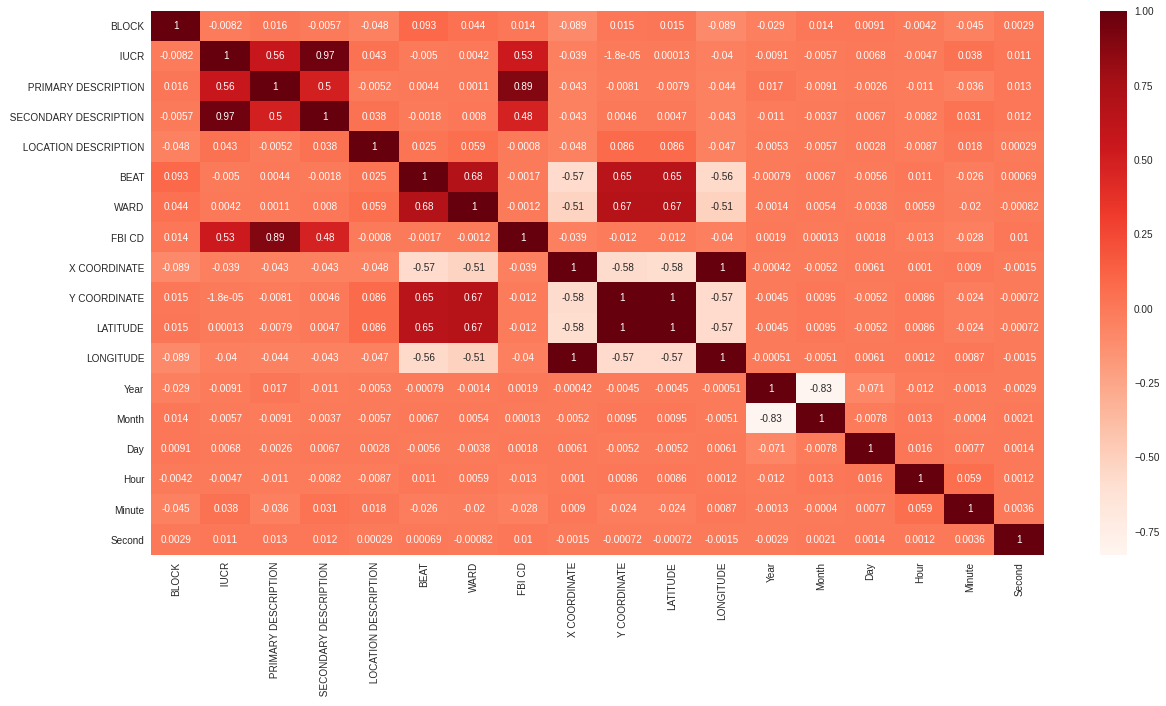

In [ ]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop([' PRIMARY DESCRIPTION'], axis=1)
Y_fs = df[' PRIMARY DESCRIPTION']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor[' PRIMARY DESCRIPTION'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

 IUCR                     0.559114
 PRIMARY DESCRIPTION      1.000000
 SECONDARY DESCRIPTION    0.495655
FBI CD                    0.893360
Name:  PRIMARY DESCRIPTION, dtype: float64

In [ ]:
#Features = [" IUCR", " SECONDARY DESCRIPTION", "FBI CD"]
Target = ' PRIMARY DESCRIPTION'
Features = [' LOCATION DESCRIPTION', "X COORDINATE", "Y COORDINATE",'LATITUDE','LONGITUDE','Year', "Month","Day","Hour","Minute","Second"]
print('Full Features: ', Features)

Full Features:  [' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']


In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  [' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
Target Class        :   PRIMARY DESCRIPTION
Training Set Size   :  (160260, 20)
Test Set Size       :  (40065, 20)


In [ ]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=300, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [ ]:

# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.3436415824285536
Recall      :  0.3436415824285536
Precision   :  0.32096658925076144
F1 Score    :  0.3436415824285536
Confusion Matrix: 
[[5495 1243    4  362  227    9    1   88   11  420   52    0    0    0
    86    1    3    0    0    0]
 [1777 4167    2  103  269   30    1  235    7  540   29    0    0    0
    38    1    0    0    0    0]
 [ 286  249    7   17   11    8    0    3    1   45    4    0    0    0
     5    0    0    0    0    0]
 [ 836  142    0  681  107    4    1   26    0    3   19    0    0    0
    46    0    3    0    0    0]
 [2107 1502    0  257  437   94    0  174    6  283   23    0    0    0
    35   12    0    0    0    0]
 [ 579  449    0    4   65  210    0    1    3  227    2    0    0    0
     2    5    0    0    0    0]
 [ 705  441    0  150   96   10    3   71    0   19   11    0    0    0
    34    0    0    0    0    0]
 [ 338  952    0  124  256    6    1  342    0   38   10    0    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


================= Classification Report =================

                                  precision    recall  f1-score   support

                         BATTERY       0.32      0.69      0.43      8002
                           THEFT       0.36      0.58      0.44      7199
               CRIMINAL TRESPASS       0.28      0.01      0.02       636
               WEAPONS VIOLATION       0.29      0.36      0.32      1868
                 CRIMINAL DAMAGE       0.25      0.09      0.13      4930
                        BURGLARY       0.52      0.14      0.21      1547
                         ROBBERY       0.38      0.00      0.00      1540
             MOTOR VEHICLE THEFT       0.31      0.16      0.22      2081
                   OTHER OFFENSE       0.30      0.01      0.01      2528
              DECEPTIVE PRACTICE       0.45      0.57      0.50      3434
                         ASSAULT       0.18      0.01      0.02      3686
                        HOMICIDE       0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


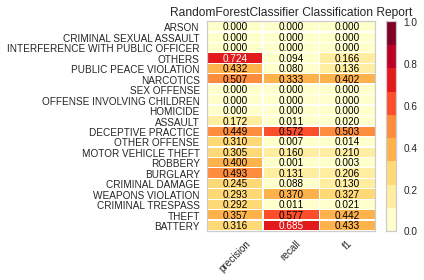

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

We can see that the results are very poor. The reason for this is, it is a multiple class problem with a very large dataset and we are trying to use the features which are very less related to the Primary Description. So however complex model we will make, it will give poor results. Hence the increase in complexity of the model doesn't matter in this case.

**A single prediction**

In [ ]:
import numpy as np
location = 'APARTMENT'
xcoord = 1166691
ycoord = 1825767
Latitude = 41.677464
Longitude =  -87.665496
YEAR = 2021
MONTH = 2
DAY = 16
HOUR = 17
MINUTE = 35
SECOND = 0


#a.c1[a.c1 == 8].index.tolist()
location = np.where(loc_labels == location)[-1][0]
#[' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'Month', 'Day', 'Hour', 'Minute', 'Second']
p = rf_model.predict([[location,xcoord,ycoord,Latitude,Longitude,YEAR,  MONTH, DAY , HOUR, MINUTE, SECOND]])
print(primary_labels[p][-1])
#print(y[Features].iloc[10,:])

BATTERY


**Arrest Classification**

In [ ]:
Classes = df['ARREST'].unique()
target_names = Classes
#Classes

In [ ]:
df['ARREST'],arrest_labels = pd.factorize(df["ARREST"])
df['ARREST'].unique()

array([0, 1])

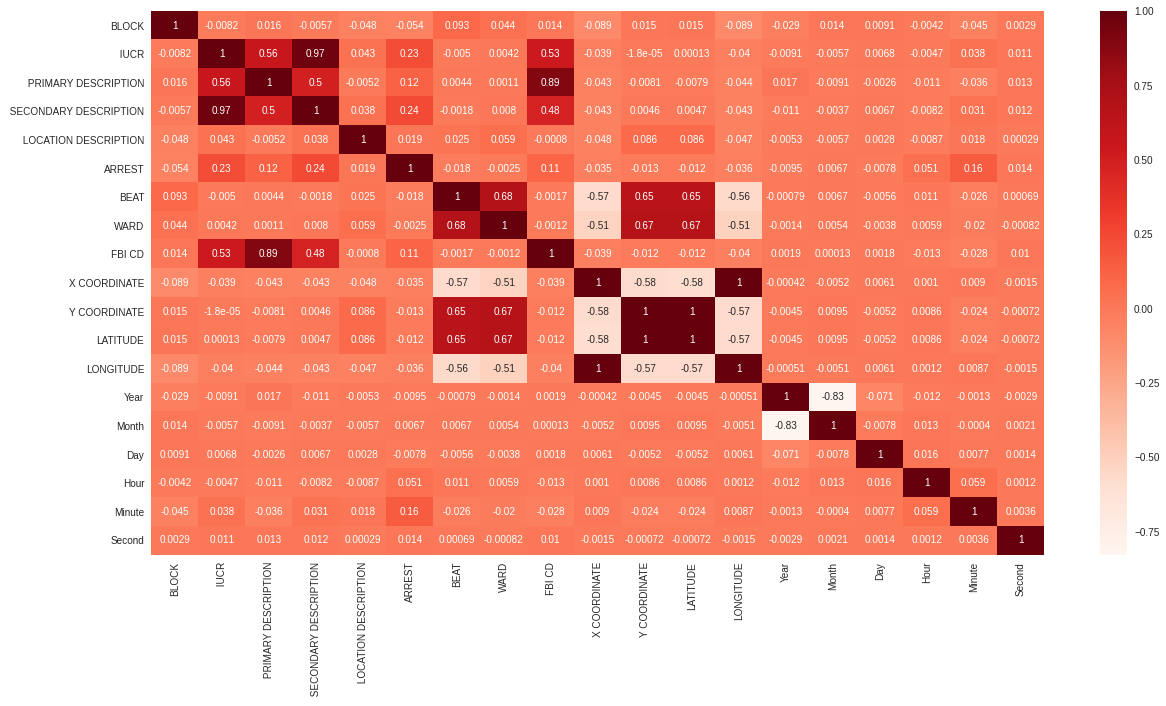

In [ ]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features

X_fs = df.drop(['ARREST'], axis=1)
Y_fs = df['ARREST']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['ARREST'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

 IUCR                     0.232804
 SECONDARY DESCRIPTION    0.237088
ARREST                    1.000000
Minute                    0.161741
Name: ARREST, dtype: float64

In [ ]:
Features = [' LOCATION DESCRIPTION', "X COORDINATE", "Y COORDINATE",'LATITUDE','LONGITUDE','Year', "Month","Day","Hour","Minute","Second"]
print('Full Features: ', Features)
Target = 'ARREST'
print('Target: ', Target)

Full Features:  [' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
Target:  ARREST


In [ ]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  [' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
Target Class        :  ARREST
Training Set Size   :  (160260, 20)
Test Set Size       :  (40065, 20)


In [ ]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=300, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.86644203169849
Recall      :  0.86644203169849
Precision   :  0.8464896023631794
F1 Score    :  0.86644203169849
Confusion Matrix: 
[[34193   216]
 [ 5135   521]]


In [ ]:
print(target_names)
y2 = pd.DataFrame(y2)
result = pd.DataFrame(result)

['N' 'Y']


================= Classification Report =================

              precision    recall  f1-score   support

           N       0.87      0.99      0.93     34409
           Y       0.71      0.09      0.16      5656

    accuracy                           0.87     40065
   macro avg       0.79      0.54      0.55     40065
weighted avg       0.85      0.87      0.82     40065



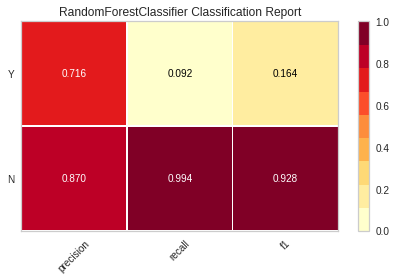

In [ ]:
# Classification Report
# Instantiate the classification model and visualizer
print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

g = visualizer.poof()             # Draw/show/poof the data

In [ ]:
import numpy as np
location = 'APARTMENT'
xcoord = 1166691
ycoord = 1825767
Latitude = 41.677464
Longitude =  -87.665496
YEAR = 2021
MONTH = 2
DAY = 16
HOUR = 17
MINUTE = 35
SECOND = 0


#a.c1[a.c1 == 8].index.tolist()
location = np.where(loc_labels == location)[-1][0]
#[' LOCATION DESCRIPTION', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'Month', 'Day', 'Hour', 'Minute', 'Second']
p = rf_model.predict([[location,xcoord,ycoord,Latitude,Longitude,YEAR,  MONTH, DAY , HOUR, MINUTE, SECOND]])
print(arrest_labels[p][-1])
#print(y[Features].iloc[10,:])

N
